In [2]:
#run only once!
%load_ext autoreload
%autoreload 2
import os
os.chdir(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

In [3]:
import numpy as np
from phidl import LayerSet
from phidl import quickplot as qp
from phidl import Path, CrossSection, Device
import phidl.path as pp
import phidl.geometry as pg
import phidl
import matplotlib.pyplot as plt
from Bertram_Functions.MyPhidlFunctions import *
from Schuster_Resonators.resonator import ChipResonatorsTline, ChipTline
from Schuster_Resonators.approx_Schuster import *
from CPW.cpw import *
import scipy.io as sc
import scipy.signal as sig

# Kinetic inductances definitions

In [4]:
Lk_12 = 12e-12 # For SiTUD20
Lk_24 = 24e-12 # For SiSC10
Lk_232 = 232e-12 # For SiChip5
epsilon_r_Si = 11.9
epsilon_r_Ge = [15.18, 16, 15.18, 16, 11.9]
thickness_subs_Si = 500e-6
thickness_subs_Ge = [50e-9, 20e-9, 600e-9, 300e-9, 600e-6]


## Comparison Tlines 12pHsq

In [95]:
# 12pH/sq
FeedlineWidth12 = [30, 80,90, 20, 80] 
FeedlineLength12  = 6200*np.ones(5)
FeedlineGap12 = [5,50,70, 1, 50]
FeedlineTaperLength12 =  100
BondpadWidth12 =  [200, 200, 200,200, 200]
BondpadLength12 = 200*np.ones(5)
BondpadGap12 = [33.33, 33.33, 155.56, 10, 125]
names = ['Tline-corrected', 'Tline', 'Tline-thicker', 'Tline-thinner', 'Tline-v1']

for i in range(3,5):
    print(names[i])
    print('Impedance of the feedline is', impedance_CPW(FeedlineWidth12[i]*1e-6, FeedlineGap12[i]*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_12), 'Ohm')
    print('Impedance of the bondpad is', impedance_CPW(BondpadWidth12[i]*1e-6, BondpadGap12[i]*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_12), 'Ohm')
    print('Frequency of the feedline is', resonance_freq_CPW(FeedlineWidth12[i]*1e-6, FeedlineGap12[i]*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_12, length_CPW=(FeedlineLength12[i] + FeedlineTaperLength12 + BondpadLength12[i])*1e-6)/1e9, 'GHz')
    print('Capacitance of the feedline is', cap_CPW_per_length(FeedlineWidth12[i]*1e-6, FeedlineGap12[i]*1e-6, epsilon_r_Si, thickness_subs_Si), 'F/m')
    print('Inductance of the feedline is', ind_CPW_per_length(FeedlineWidth12[i]*1e-6, FeedlineGap12[i]*1e-6, ind_kin_sq=Lk_12), 'H/m')
    print(epsilon_eff_CPW(FeedlineWidth12[i]*1e-6, FeedlineGap12[i]*1e-6, epsilon_r_Si, thickness_subs_Si), 'Effective dielectric constant')
    print('\n')

Tline-thinner
Impedance of the feedline is 50.926688457075116 Ohm
Impedance of the bondpad is 29.587710131926112 Ohm
0.0065
Frequency of the feedline is 1.531339188035577 GHz
Capacitance of the feedline is 3.139712930959948e-10 F/m
Inductance of the feedline is 8.142932133742844e-07 H/m
6.046997161305189 Effective dielectric constant


Tline-v1
Impedance of the feedline is 49.63979337993569 Ohm
Impedance of the bondpad is 45.859807254244714 Ohm
0.0065
Frequency of the feedline is 2.0455031629048253 GHz
Capacitance of the feedline is 2.411441076971795e-10 F/m
Inductance of the feedline is 5.942053870055506e-07 H/m
9.627241835916148 Effective dielectric constant




Final version 12pHsq v1


In [100]:
# 12pH/sq v1
FeedlineWidth12 = 80
FeedlineLength12  = 6200
FeedlineGap12 = 52.5
FeedlineTaperLength12 =  100
BondpadWidth12 =  200
BondpadLength12 = 200
BondpadGap12 = BondpadWidth12*FeedlineGap12/FeedlineWidth12


print('Impedance of the feedline is', impedance_CPW(FeedlineWidth12*1e-6, FeedlineGap12*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_12), 'Ohm')
# print('Impedance of the bondpad is', impedance_CPW(BondpadWidth12*1e-6, BondpadGap12*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_12), 'Ohm')
print('Frequency of the feedline is', resonance_freq_CPW(FeedlineWidth12*1e-6, FeedlineGap12*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_12, length_CPW=(FeedlineLength12 + FeedlineTaperLength12 + BondpadLength12)*1e-6)/1e9, 'GHz')

Impedance of the feedline is 50.04594572220823 Ohm
0.0065
Frequency of the feedline is 2.0383645103612884 GHz


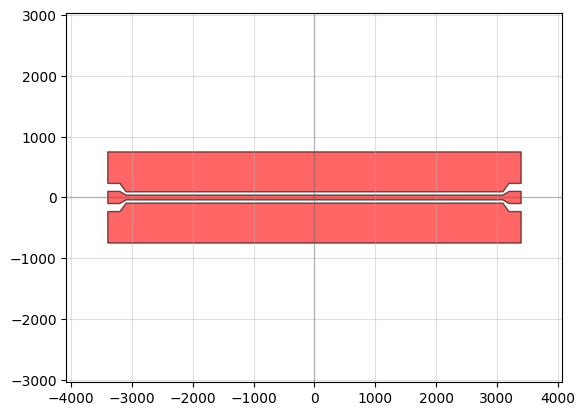

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\Tline-tests\\20240527-SiRes-12pHsq-Tline-v1.gds'

In [103]:
ChipSize12 = [FeedlineLength12 + 2*BondpadLength12 + 2*FeedlineTaperLength12, 1500]

_, _, TLine12 = ChipTline(ChipSize12,
                          FeedlineWidth12, 
                          FeedlineLength12, 
                          FeedlineGap12, 
                          FeedlineTaperLength12, 
                          BondpadWidth12, 
                          BondpadLength12, 
                          BondpadGap12)
qp(TLine12)
TLine12.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\Tline-tests\20240527-SiRes-12pHsq-Tline-v1.gds")


MWO simulations

In [13]:
path = r'C:\Users\LocalAdmin\Documents\GitHub\resonators\mat_files\20240603-12pHsq-Tline'
file_list = os.listdir(path)
print(file_list)
d_12 = {}

# Load the data
for file in file_list:
    name = file.split('.')[0]
    name = name[7:]
    print(name)
    file_path = os.path.join(path, file)
    mat_contents = sc.loadmat(file_path)
    freq = mat_contents['X\x00\x00\x00\x00\x00\x00\x00'][0]
    y_data = mat_contents['Y\x00\x00\x00\x00\x00\x00\x00'][0]
    d_12[name] = {'freq': freq, 'amp': y_data}
    

['12pHsq_Tline.mat', '12pHsq_Tline_corrected.mat', '12pHsq_Tline_thicker.mat', '12pHsq_Tline_thinner.mat']
Tline
Tline_corrected
Tline_thicker
Tline_thinner


Text(0.5, 1.0, '12pH/sq Tlines')

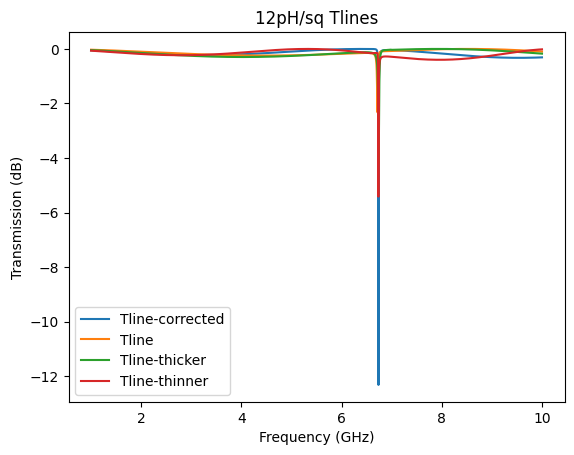

In [15]:
plt.plot(d_12['Tline_corrected']['freq']*1e-9, d_12['Tline_corrected']['amp'], label='Tline-corrected')
plt.plot(d_12['Tline']['freq']*1e-9, d_12['Tline']['amp'], label='Tline')
plt.plot(d_12['Tline_thicker']['freq']*1e-9, d_12['Tline_thicker']['amp'], label='Tline-thicker')
plt.plot(d_12['Tline_thinner']['freq']*1e-9, d_12['Tline_thinner']['amp'], label='Tline-thinner')
plt.legend()
plt.xlabel('Frequency (GHz)')
plt.ylabel('Transmission (dB)')
plt.title('12pH/sq Tlines')

Mistery discovered --> Resonances due to finite chip Y size!!!! That's why the resonances do not move for all these TLines. TLines do not resonate.

Sonnet simulations

In [75]:
import csv
path = r'C:\Users\LocalAdmin\Documents\GitHub\resonators\mat_files\20240603-12pHsq-Tline-Sonnet'
file_list = os.listdir(path)
print(file_list)
d_12_Sonnet = {}
for file in file_list:
    with open(os.path.join(path, file_list[0])) as f:
        reader = csv.reader(f)
        freq = []
        amp = []
        for i, row in enumerate(reader):
            if i>2:
                freq.append(float(row[0]))
                amp.append(20*np.log10(float(row[5])))

        name = file.split('.')[0][22:]
        print(name)
        print(amp)
        d_12_Sonnet[name] = {'freq': freq, 'amp': amp}

    


['20240527-SiRes-12pHsq-Tline-corrected.csv', '20240527-SiRes-12pHsq-Tline-thicker-final.csv', '20240527-SiRes-12pHsq-Tline-thinner.csv', '20240527-SiRes-12pHsq-Tline.csv']
Tline-corrected
[-0.06301447376183061, -0.06581680719720129, -0.06865487485936504, -0.07152716392976165, -0.07443212000573507, -0.07736814664780528, -0.08033360554123664, -0.08332681718944204, -0.0863460620697527, -0.08938958219244192, -0.09245558298710294, -0.09554223547187743, -0.0986476786222662, -0.10177002193684116, -0.10490734810840982, -0.10805771578885766, -0.11121916240511952, -0.1143897069879207, -0.11756735300473459, -0.12075009115401619, -0.12393590211721445, -0.12712275924478939, -0.1303086311681994, -0.13349148432624763, -0.13666928539586015, -0.13984000363058083, -0.1430016130914579, -0.14615209478146288, -0.1492894386707117, -0.15241164562623014, -0.15551672923612067, -0.15860271753745062, -0.16166765465448277, -0.16470960233532095, -0.16772664141571864, -0.17071687318838305, -0.17367842070209993, -0

Text(0.5, 1.0, '12pH/sq Tlines Sonnet')

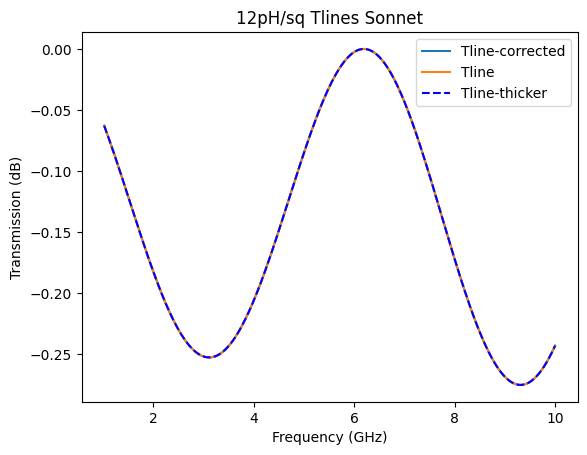

In [79]:
plt.plot(d_12_Sonnet['Tline-corrected']['freq'], d_12_Sonnet['Tline-corrected']['amp'], label='Tline-corrected')
plt.plot(d_12_Sonnet['Tline']['freq'], d_12_Sonnet['Tline']['amp'], label='Tline')
plt.plot(d_12_Sonnet['Tline-thicker-final']['freq'], d_12_Sonnet['Tline-thicker-final']['amp'], 'b--', label='Tline-thicker')

# plt.plot(d_12_Sonnet['Tline-thinner']['freq'], d_12_Sonnet['Tline-thinner']['amp'], label='Tline-thinner')
plt.legend()
plt.xlabel('Frequency (GHz)')
plt.ylabel('Transmission (dB)')
plt.title('12pH/sq Tlines Sonnet')

# 24pH/sq

In [5]:
# 24pH/sq
FeedlineWidth24 = 50.1
FeedlineLength24  = 6200
FeedlineGap24 = 5
FeedlineTaperLength24 =  100
BondpadWidth24 =  230
BondpadLength24 = 200
BondpadGap24 = BondpadWidth24*FeedlineGap24/FeedlineWidth24


print('Impedance of the feedline is', impedance_CPW(FeedlineWidth24*1e-6, FeedlineGap24*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_24), 'Ohm')
# print('Impedance of the bondpad is', impedance_CPW(BondpadWidth24*1e-6, BondpadGap24*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_24), 'Ohm')
print('Frequency of the feedline is', resonance_freq_CPW(FeedlineWidth24*1e-6, FeedlineGap24*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_24, length_CPW=(FeedlineLength24 + FeedlineTaperLength24 + BondpadLength24)*1e-6)/1e9, 'GHz')

Impedance of the feedline is 50.06035358042184 Ohm
0.006
Frequency of the feedline is 1.8087534382294541 GHz


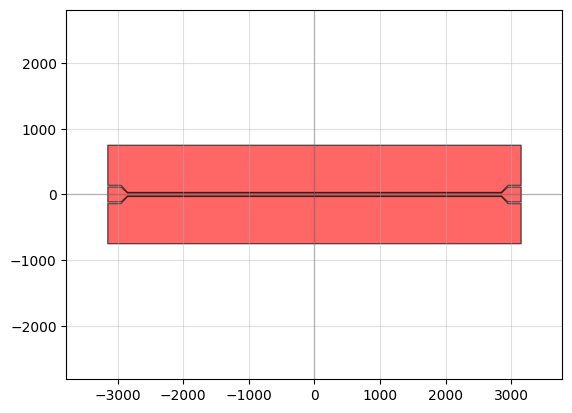

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\20240604-SiRes-24pHsq\\20240604-SiRes-24pHsq-Tline-v1.gds'

In [7]:
ChipSize24 = [FeedlineLength24 + 2*BondpadLength24 + 2*FeedlineTaperLength24, 1500]

_, _, TLine24 = ChipTline(ChipSize24,
                          FeedlineWidth24, 
                          FeedlineLength24, 
                          FeedlineGap24, 
                          FeedlineTaperLength24, 
                          BondpadWidth24, 
                          BondpadLength24, 
                          BondpadGap24)
qp(TLine24)
TLine24.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20240604-SiRes-24pHsq\20240604-SiRes-24pHsq-Tline-v1.gds")
